# Psychoinformatics - Week 13 (Examples)
by Tsung-Ren (Tren) Huang (trhuang@g.ntu.edu.tw)

In [2]:
%config IPCompleter.greedy=True 
%matplotlib inline
import numpy as np, scipy.misc
import cv2
import matplotlib.pyplot as plt

## 1 Basic Imaging Processing

### 1.1 Color to gray images

#### 1.1.1 The Matplot way

(360, 510, 3) <class 'numpy.ndarray'> uint8
(360, 510)


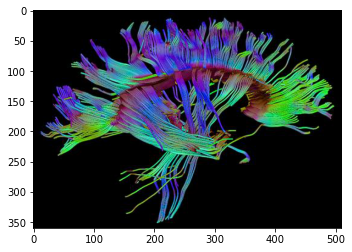

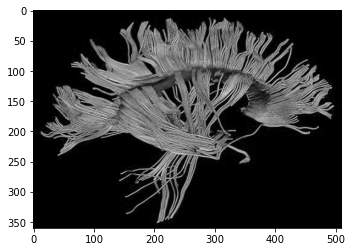

In [ ]:
import matplotlib.pyplot as plt
plt.close('all'); img1=plt.imread('DTI.jpg')
print(img1.shape,type(img1),img1.dtype)
plt.imshow(img1); plt.figure()
img2=np.mean(img1,2); print(img2.shape)
plt.imshow(img2,cmap=plt.cm.gray)
plt.imsave('DTI_gray.jpg',img2, cmap=plt.cm.gray)

#### 1.1.1 The PIL/Pillow way

In [ ]:
from PIL import Image
img=Image.open('DTI.jpg')
img2=img.convert('L')
img2.show()
img2.save('DTI_gray.jpg')

### 1.2 Image Contrast

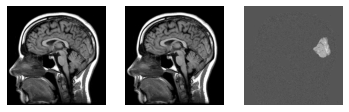

In [ ]:
import matplotlib.pyplot as plt
img=[]
img.append(np.float64(plt.imread('MRI1.jpg')))
img.append(np.float64(plt.imread('MRI2.jpg')))
img.append(img[1]-img[0]) #contrast
for i in range(3):
 plt.subplot(1,3,i+1); plt.axis('off')
 plt.imshow(img[i],cmap=plt.cm.gray)

### 1.3 Image Blending & Filtering

#### 1.3.1 The Matplotlib way

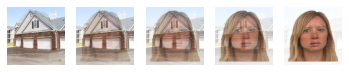

In [ ]:
import matplotlib.pyplot as plt
img1=plt.imread('face.jpg') # for FFA
img2=plt.imread('house.jpg') # for PPA
k=np.arange(1,10,2)/10.0
for i in range(5):
    plt.subplot(1,5,i+1);plt.axis('off')
    hybrid=k[i]*img1+(1-k[i])*img2
    plt.imshow(hybrid/255.0)

#### 1.3.2 PIL/The Pillow way

In [ ]:
from PIL import Image
from PIL.ImageFilter import (
   BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
   EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN
)
img1=Image.open('house.jpg')
img2=Image.open('face.jpg')
k=np.arange(1,10,2)/10.0
for i in range(5):
    hybrid=Image.blend(img1,img2,k[i])
    hybrid=hybrid.filter(CONTOUR) # Applying a contour filter
    hybrid.show()

### 1.4 Color Maps

#### 1.4.1 Matplotlib (RGB) vs. OpenCV (BGR)

(2, 2, 3)
[[[0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]]]


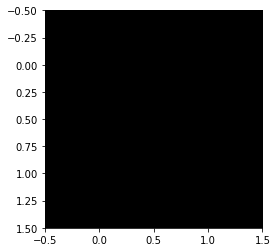

In [ ]:
# Use Matplotlib to show an blank image:
img=np.zeros((2,2,3),dtype='uint8')
print(img.shape)
print(img)
plt.imshow(img);

[[[255   0   0]
  [  0 255   0]]

 [[  0   0 255]
  [  0   0   0]]]


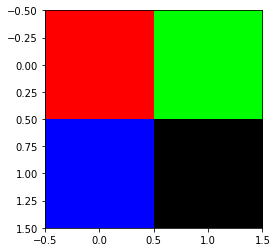

In [ ]:
# Manipulate the RGB values of a pixel:
img2=img.copy()
img2[0,0,0],img2[0,1,1],img2[1,0,2]=[255,255,255]
print(img2)
plt.imshow(img2);

In [ ]:
# Try OpenCV, which uses the order of BGR rather than RGB:
#!pip install opencv-python
import cv2
cv2.startWindowThread()
cv2.imshow('Test',img2)
cv2.waitKey(5000);
cv2.destroyAllWindows()

#### 1.4.2 From files

In [ ]:
# Download the girl!
import urllib.request
urllib.request.urlretrieve('http://www.gx8899.com/uploads/allimg/171025/3-1G025101H3-50.jpg','girl.jpg')
img3=cv2.imread('girl.jpg')
print(img3.shape)

(300, 300, 3)


In [ ]:
# Show me the girl by OpenCV
cv2.imshow('Test',img3)
cv2.waitKey(5000);
cv2.destroyAllWindows()

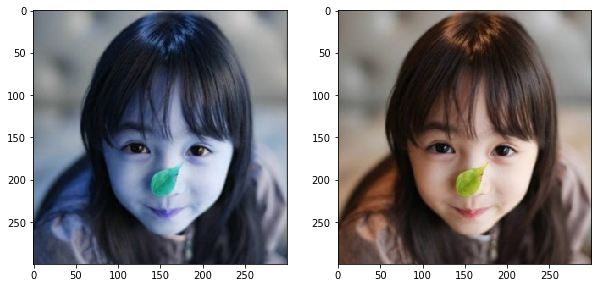

In [ ]:
# Show me the girl by Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(img3)
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB));

(300, 300)


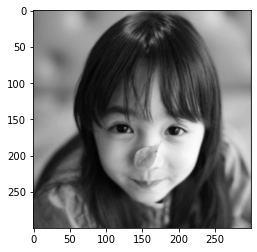

In [ ]:
img3_gray=cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
print(img3_gray.shape)
cv2.imwrite('girl_gray.jpg',img3_gray)
plt.imshow(img3_gray,cmap='gray');

### 1.5 2D Spatial Filtering/Convolution

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


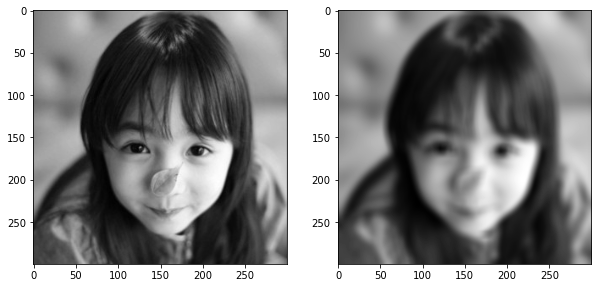

In [ ]:
kernel1=np.ones((10,10),np.float32)/100
print(kernel1)
img3_gray_smooth=cv2.filter2D(img3_gray,-1,kernel1)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(img3_gray,cmap='gray');
plt.subplot(1,2,2); plt.imshow(img3_gray_smooth,cmap='gray');

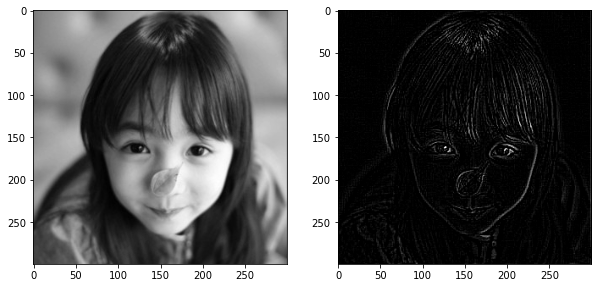

In [ ]:
# LGN cells: on-center off-surround RF
kernel2=np.array([[-1,-1,-1],
                  [-1,8,-1],
                  [-1,-1,-1]])
img3_gray_LGN=cv2.filter2D(img3_gray,-1,kernel2)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(img3_gray,cmap='gray')
plt.subplot(1,2,2); plt.imshow(img3_gray_LGN,cmap='gray');

### 1.6 Down-sampling

#### 1.6.1 Image pyramid (w/ Gaussian smoothing)
<img src="https://www.pyimagesearch.com/wp-content/uploads/2015/03/pyramid_example.png">

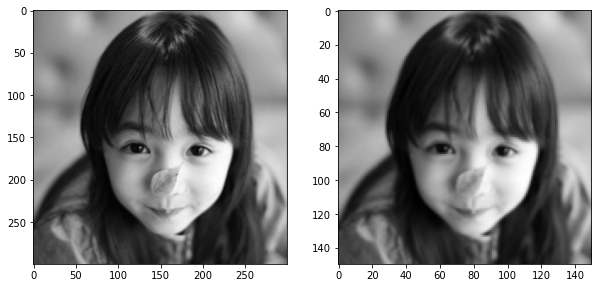

In [ ]:
img3_gray_small=cv2.pyrDown(img3_gray)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(img3_gray,cmap='gray')
plt.subplot(1,2,2); plt.imshow(img3_gray_small,cmap='gray');

### 1.6.2 Max pooling
<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png" width=50%>

In [ ]:
import skimage.measure

a = np.array([
      [ 12,  20, 30,  0],
      [  8,  12,  2,  0],
      [ 34,  70, 37,  4],
      [112, 100, 25, 12]])

skimage.measure.block_reduce(a, (2,2), np.max)

array([[ 20,  30],
       [112,  37]])

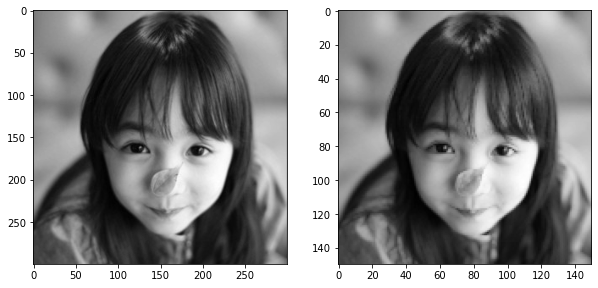

In [ ]:
img3_gray_maxpooled=skimage.measure.block_reduce(img3_gray, (2,2), np.max)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(img3_gray,cmap='gray')
plt.subplot(1,2,2); plt.imshow(img3_gray_maxpooled,cmap='gray');

## 2 Traditional Computer Vision

### 2.1 Face Detection

#### 2.1.1 Basic detection using Haar Cascades

[[ 69 100 175 175]]


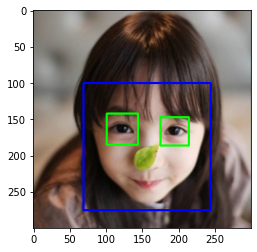

In [ ]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml','haarcascade_frontalface_default.xml')
urllib.request.urlretrieve('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml','haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(img3_gray)
print(faces) # (x,y, width, height)
for (x,y,w,h) in faces:
    cv2.rectangle(img3,(x,y),(x+w,y+h),(255,0,0),2) # face bounding box
    roi_gray = img3_gray[y:y+h, x:x+w]
    roi_color = img3[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) # eye bounding box
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB));

#### 2.1.2 Facial landmarks using Dlib

In [ ]:
#! pip install cmake dlib
import dlib, urllib.request, cv2
model="shape_predictor_68_face_landmarks.dat"
urllib.request.urlretrieve('https://github.com/italojs/facial-landmarks-recognition/raw/master/shape_predictor_68_face_landmarks.dat',model)
img3=cv2.imread('girl.jpg')
detector=dlib.get_frontal_face_detector()
poses=dlib.shape_predictor(model)
#win=dlib.image_window()
detected_faces=detector(img3)
print("Found {} faces in the image".format(len(detected_faces)))
#win.set_image(img3)
for i, rect in enumerate(detected_faces):
    print("Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i,rect.left(),rect.top(),rect.right(),rect.bottom()))
    #win.add_overlay(rect)
    landmarks=poses(img3,rect)
    print("{} landmarks found".format(landmarks.num_parts))
    #win.add_overlay(landmarks)

Found 1 faces in the image
Face #0 found at Left: 74 Top: 114 Right: 254 Bottom: 293
68 landmarks found


In [ ]:
#Visualize the 68 facial landmarks
for n in range(0, 68):
    x = landmarks.part(n).x
    y = landmarks.part(n).y
    print(n,x,y)
    cv2.circle(img3, (x, y), 4, (255, 0, 0), -1)
    
cv2.imshow("Image", img3)
cv2.waitKey(5000)

0 78 154
1 79 174
2 82 194
3 89 212
4 99 229
5 112 242
6 126 255
7 140 266
8 155 269
9 169 266
10 182 255
11 197 244
12 212 231
13 222 214
14 228 196
15 233 177
16 236 157
17 89 149
18 100 137
19 117 133
20 134 134
21 150 140
22 175 141
23 190 134
24 206 133
25 221 138
26 229 151
27 160 160
28 159 170
29 158 180
30 158 190
31 141 207
32 148 207
33 156 208
34 163 207
35 171 207
36 107 164
37 117 159
38 129 159
39 137 168
40 128 170
41 116 169
42 180 169
43 189 160
44 200 160
45 208 166
46 201 171
47 189 172
48 132 234
49 142 233
50 150 229
51 155 231
52 159 229
53 169 233
54 181 233
55 171 240
56 161 243
57 156 244
58 151 243
59 143 241
60 136 235
61 150 236
62 155 236
63 159 236
64 177 235
65 161 236
66 157 236
67 151 235


-1

### 2.2 Facial Emotion Recognition
With facial landmarks, you can then <a href="https://theonly1.tistory.com/106">recognize facial emotions</a>.

### 2.3 Object Detection

#### 2.3.1 Haar Cascades
You can either <a href="https://www.instructables.com/id/Create-OpenCV-Image-Classifiers-Using-Python/">train your own object detection model using Haar Cascades</a> or Google a model like "haarcascade car .xml".

## 3 DL-based Computer Vision

## 3.0  The CIFAR-10 dataset

<img src="https://alexisbcook.github.io/assets/cifar10.png" width=75%>

In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(set(y_train[:,0]),set(y_test[:,0]))
classes=['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


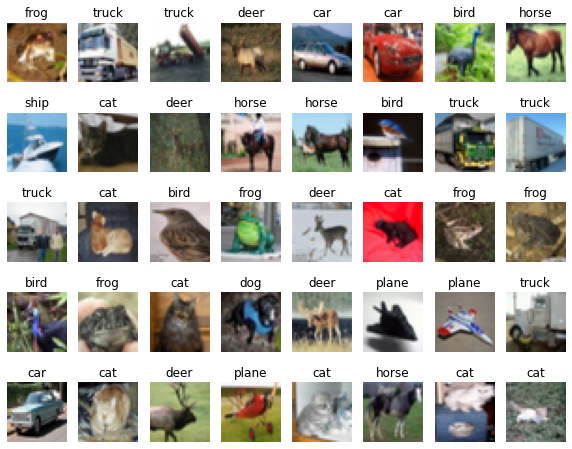

In [3]:
plt.figure(figsize=(10, 8))
for i in range(40):
    plt.subplot(5,8,i+1);
    plt.imshow(x_train[i]); 
    plt.title(classes[y_train[i,0]]); 
    plt.axis('off')

### 3.1 LeNet
<img src="https://4.bp.blogspot.com/-Xc-1oK8cPHs/WS4aYCpsnSI/AAAAAAAADdU/jOARrMWGj3gs_pAXU-C4ryAFa8C_CuBfACLcB/s1600/fig_1_3_LeCun.png">

In [4]:
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(16, (5, 5), padding='valid', activation = 'relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation = 'relu'))
model.add(Dense(84, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
opt=keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [5]:
# load & preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

# Training:
model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), shuffle=True)

# save the model
model.save('lenet_cifar10.h5')

Epoch 1/50
391/391 [==============================] - 12s 7ms/step - loss: 1.8320 - accuracy: 0.3419 - val_loss: 1.8084 - val_accuracy: 0.3681
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.5276 - accuracy: 0.4548 - val_loss: 1.4363 - val_accuracy: 0.4805
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.3971 - accuracy: 0.5020 - val_loss: 1.3924 - val_accuracy: 0.5078
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.3169 - accuracy: 0.5310 - val_loss: 1.3791 - val_accuracy: 0.5105
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.2546 - accuracy: 0.5554 - val_loss: 1.4241 - val_accuracy: 0.5005
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 1.2045 - accuracy: 0.5742 - val_loss: 1.2576 - val_accuracy: 0.5562
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 1.1584 - accuracy: 0.5906 - val_loss: 1.2038 - val_accuracy: 0.5701
Epoch

In [19]:
# load a pre-trained model:
#model=keras.models.load_model('lenet_cifar10.h5')

# Testing (on the training data):
Ypred=model.predict(x_train[0:2])
print(Ypred,'\n','-'*30,'\n',y_train[0:2],'\n','-'*30)
print(np.argmax(Ypred,axis=1),np.argmax(y_train[0:2],axis=1))

1/1 [==============================] - 0s 15ms/step
[[1.50220847e-09 2.94123748e-09 2.65846252e-01 5.34515828e-02
  3.89661873e-03 4.09123838e-01 1.64645851e-01 1.03035875e-01
  1.66924785e-08 3.11101878e-09]
 [1.71565290e-07 7.26400051e-11 2.21236974e-07 2.59575250e-10
  6.34708073e-08 1.72152813e-11 9.39991661e-12 4.83263740e-09
  1.27423434e-07 9.99999404e-01]] 
 ------------------------------ 
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] 
 ------------------------------
[5 9] [6 9]


### 3.2 Advanced CNNs
Check out more pre-trained models on https://keras.io/applications/

In [21]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')

print(model.summary())

102967424/102967424 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

#### 3.3 Object detection
Please try YOLOv1~v6 by yourself.